<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo42/blob/main/ActividadSemana_4_PC_A01793944_A01113135ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semana 4 (PCA)
# Daniel Velasco Zarate A01793944
# Marco Antonio López Millán A01113135
# Ciencia y analítica de datos (Gpo 10)
# 11/10/2022**

In [ ]:
import pandas as pd #importando pandas
import numpy as np #importando numby
payments = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv" #asignando la bd a payments
payments_df = pd.read_csv(payments, index_col = 0) #creando un data 
payments_df.index.name = None
payments_df.rename(columns = {'X3': 'Edu', 'X2': 'Gender', 'X4': 'MStatus', 'X5': 'Age', 'X11':'pastPayment', 'X12': 'amountBillStatement','X18': 'amountPreviousPayment', 'X1': 'amountCredit'}, inplace = True)
#cambiando de nombre a las columnas
df = payments_df.copy() #creando un nuevo df al copiar
df.iloc[:, 0:23]


,amountCredit,Gender,Edu,MStatus,Age,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,amountPreviousPayment,X19,X20,X21,X22,X23
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
pcs = PCA()
#pcs.fit(payments_df.iloc[:, 0:23].dropna(axis=0))
#normalize the values in order to make them have same scale
pcs.fit(preprocessing.scale(payments_df.iloc[:, 0:23].dropna(axis=0))) 
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC19','PC19', 'PC20', 'PC21','PC22','PC23']
pcsSummary_df = pcsSummary_df.round(4)
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC19,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5581,2.0243,1.2454,1.2131,1.0128,0.9783,0.9528,0.9422,0.9335,0.8849,...,0.7243,0.6354,0.5097,0.4992,0.4345,0.3632,0.2649,0.2020,0.1590,0.1524
Proportion of variance,0.2845,0.1782,0.0674,0.0640,0.0446,0.0416,0.0395,0.0386,0.0379,0.0340,...,0.0228,0.0176,0.0113,0.0108,0.0082,0.0057,0.0030,0.0018,0.0011,0.0010
Cumulative proportion,0.2845,0.4627,0.5301,0.5941,0.6387,0.6803,0.7198,0.7584,0.7962,0.8303,...,0.9394,0.9570,0.9683,0.9791,0.9873,0.9931,0.9961,0.9979,0.9990,1.0000


Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [ ]:
((pcsSummary_df.iloc[2][11])*100).round(0)

89.0

Se puede ver que para lograr representar el 89% de la varianza podemos usar los componentes que van desde PC1 hasta PC12, serian los primeros 12 componentes.

**Paso 2: Interprete cada componente principal en términos de las variables originales**

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
#get the components
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = payments_df.iloc[:, 0:23].columns
                                )
pcsComponents_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC19,PC19,PC20,PC21,PC22,PC23
amountCredit,0.0685,0.3164,0.0173,0.0695,-0.1500,-0.3751,0.1066,-0.0595,0.0219,0.0173,...,-0.7541,-0.0236,0.0423,-0.0252,0.0067,0.0067,-0.0099,0.0145,-0.0006,0.0028
Gender,-0.0216,0.0302,0.0243,-0.0781,0.8834,-0.3963,0.0652,-0.0280,0.0191,0.0240,...,0.1133,0.0248,-0.0001,0.0211,-0.0038,-0.0020,0.0018,-0.0007,-0.0008,0.0008
Edu,0.0192,-0.0915,-0.3166,0.2465,0.3657,0.5636,-0.4006,0.0805,-0.1562,0.0628,...,-0.3728,-0.0359,0.0094,-0.0406,0.0043,0.0021,-0.0027,0.0006,0.0014,0.0017
MStatus,-0.0056,-0.0430,0.4537,-0.4439,-0.0532,0.2800,-0.1606,0.0263,-0.0565,0.0388,...,0.1338,0.0060,0.0062,-0.0143,-0.0056,-0.0008,-0.0025,-0.0002,0.0007,-0.0012
Age,0.0143,0.0667,-0.4630,0.4620,-0.1643,-0.0881,0.0814,-0.0127,0.0471,0.0080,...,0.4326,0.0239,0.0012,0.0006,-0.0057,-0.0059,0.0000,-0.0016,-0.0000,0.0002
X6,0.1612,-0.2983,-0.0174,0.0164,-0.0355,-0.0391,-0.0867,0.0211,-0.0308,0.0034,...,-0.0975,-0.6081,-0.2419,0.0166,0.1352,-0.0332,-0.0051,-0.0003,-0.0028,0.0002
X7,0.1942,-0.3349,0.0178,0.0501,-0.0380,-0.0607,-0.0919,0.0153,-0.0336,0.0066,...,-0.0834,0.3211,0.5580,-0.0725,-0.4857,0.1399,-0.0312,0.0127,0.0033,-0.0000
X8,0.2003,-0.3438,0.0615,0.0841,-0.0239,-0.0696,-0.0210,-0.0266,-0.0115,-0.0249,...,-0.0847,0.5417,-0.1058,-0.1569,0.6063,-0.3064,0.0253,-0.0281,-0.0085,-0.0048
X9,0.2072,-0.3445,0.0887,0.1092,-0.0079,-0.0873,0.0394,-0.0561,0.0446,-0.0570,...,-0.0606,0.1713,-0.5858,0.0780,-0.2261,0.5676,0.0192,0.0018,0.0140,-0.0014
X10,0.2110,-0.3315,0.1086,0.1154,0.0019,-0.0872,0.1040,-0.0337,0.0549,0.0668,...,-0.0207,-0.1784,-0.0774,0.1456,-0.3858,-0.6742,0.0272,0.0233,-0.0083,-0.0006


In [ ]:
pcsComponents_df.PC1.nlargest(3) #consulta los componente con mayor peso

X15    0.353848
X16    0.351716
X14    0.349744
Name: PC1, dtype: float64

**PC1** = Para el primer componente PC1, el estado de la cuenta a pagar para el mes de junio tiene un peso importante junto con el  estado de cuenta a pagar en el mes de mayo y julio


In [ ]:
pcsComponents_df.PC2.nsmallest(3) 

X9   -0.344508
X8   -0.343802
X7   -0.334879
Name: PC2, dtype: float64

**PC2** = Para este componente los pocos pagos realizados en el mes de junio, julio y agosto son las variables que mayor peso tienen al momento de realizar en analisis.

In [ ]:
pcsComponents_df.PC3.nsmallest(3)

Age                   -0.463023
Edu                   -0.316638
amountBillStatement   -0.150587
Name: PC3, dtype: float64

**PC3** = En este component las personas con baja edad y poca educacion  son las personas que no tienen cuentas tan altas para pagar. 

In [ ]:
pcsComponents_df.PC4.nlargest(3)

Age                      0.462041
X19                      0.311715
amountPreviousPayment    0.280571
Name: PC4, dtype: float64

**PC4** = Las personas con una edad mas elevada pagaron sus deudas en agosto y septiembre

In [ ]:
pcsComponents_df.PC5.nlargest(3)

Gender    0.883357
Edu       0.365704
X19       0.107895
Name: PC5, dtype: float64

**PC5** = Personas con edad alta, y un nivel medio de educacion pagaron sus deudas en agosto. 

In [ ]:
pcsComponents_df.PC6.nlargest(3)

Edu        0.563608
MStatus    0.280022
X19        0.256009
Name: PC6, dtype: float64

**PC6** = Las personas con buena educacion tienden a pagar sus deudas en agosto. Aca tambien juega un papel importante si la persona esta casada o no.

In [ ]:
pcsComponents_df.PC7.nsmallest(3)

X22   -0.702689
Edu   -0.400609
X23   -0.357965
Name: PC7, dtype: float64

**PC7** = Las personas que no hacen sus pagos en mayo y abril, tienen poca educacion 

In [ ]:
pcsComponents_df.PC8.nsmallest(3)

X23                     -0.539231
amountPreviousPayment   -0.266552
X19                     -0.217601
Name: PC8, dtype: float64

PC8 = Las personas realizaron pocos pagos pasados en los meses de abril, septiembre y agosto.

In [ ]:
pcsComponents_df.PC8.nsmallest(3)

X23                     -0.539231
amountPreviousPayment   -0.266552
X19                     -0.217601
Name: PC8, dtype: float64

**PC9** = Las personas realizaron pocos pagos principalmente en el mes de de abril

In [ ]:
pcsComponents_df.PC10.nlargest(3)

X20    0.784894
X15    0.123613
X23    0.104824
Name: PC10, dtype: float64

**PC10** = Las personas realizaron sus pagos principalmente en el mes de julio

In [ ]:
pcsComponents_df.PC11.nsmallest(3)

amountPreviousPayment   -0.728411
X22                     -0.185047
X13                     -0.132658
Name: PC11, dtype: float64

**PC11** = Las personas realizaron pocos pagos en septiembre

In [ ]:
pcsComponents_df.PC12.nlargest(3)

X6     0.623610
X7     0.376411
X20    0.141091
Name: PC12, dtype: float64

**PC12** = El estado de los repayment en septiembre y agosto fue alto

In [ ]:
pcsComponents_df.PC13.nlargest(3)

MStatus         0.666526
Age             0.577125
amountCredit    0.359992
Name: PC13, dtype: float64

**PC13** = El marital status junto con las personas adultas demuestra que estas tienen un credito monetario medianamente alto. 

In [ ]:
pcsComponents_df.PC14.nsmallest(3)

amountCredit   -0.754050
Edu            -0.372845
X6             -0.097477
Name: PC14, dtype: float64

**PC14** = El monto de dinero prestado es bajo para personas con poca educacion  

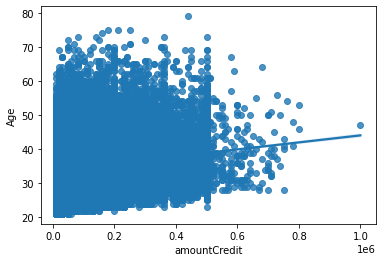

In [ ]:
import seaborn as sns
p = sns.regplot(data = df,  
                x = df.amountCredit, 
                y = df.Age
               ) 
p

En el grafico se puede ver por ejemplo que un valor atipico es que se da un credito alto a una persona mayor de aproximadamente 80 años.
En general se puede ver en el grafico que no es comun dar creditos medianamente altos a personas con edad avanzada.

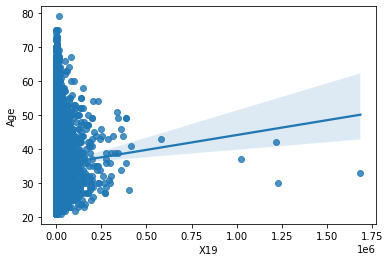

In [ ]:
p = sns.regplot(data = df,  
                x = df.X19, 
                y = df.Age
               ) 
p

En el grafico se puede apreciar que las personas con edad avanzada realizaron pagos en agosto pero no son pagos muy elevados. Ademas existen personas que realizaron pagos grandes en el mes de agosto y que tienen una edad que no supera los 40 años.

**¿Cuál es el número de componentes mínimo y por qué?**
Tenemos 23 componentes pero de estos si usamos los 12 primeros componentes  se logra obtener un 89% de la variabilidad. Esto significa que por lo cual podemos dejar de lado los otros 11 componentes y enfocarnos solamente en los 12 primeros valores. 

**¿Cuál es la variación de los datos que representan esos componentes?**
PC1_proportion_variance = 0.2845
PC2_proportion_variance = 0.1782
PC3_proportion_variance = 0.0674
PC4_proportion_variance = 0.064
PC5_proportion_variance = 0.0446
PC6_proportion_variance = 0.0416
PC7_proportion_variance = 0.0395
PC8_proportion_variance = 0.0386
PC9_proportion_variance = 0.0379
PC10_proportion_variance = 0.034
PC11_proportion_variance = 0.0319
PC12_proportion_variance = 0.0297

**¿Cuál es la pérdida de información después de realizar PCA?**
Despues de realizar PCA y elegir los primeros 12 componentes, la variabilidad que se esta perdiendo es de un 11%

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**
PC1 = El estado de la cuenta a pagar para el mes de junio tiene la mayor importancia y el de menor importancia es el marital status.
PC2 = Pagos pasados en el mes de junio es la variable de mayor importancia. Y el marital status tiene menor importancia.
PC3 = La edad es la variable mas importante, mientras que el pago pasado en el mes de septiembre es la de menor peso.
PC4 = La edad es la variable de mayor peso y la de menor peso es es el pago realizado en septiembre.
PC5 = La variable de mayor peso es el genero mientras que la de menor importancia es el pago pasado en el mes de mayo. 

In [ ]:
pcsComponents_df.PC6.abs().idxmin()

'amountBillStatement'

PC6 = La variable educacion tiene mayor importancia mientras que el importe de la factura en septiembre es la variable de menor importancia.


In [ ]:
pcsComponents_df.PC7.abs().idxmin()

'X14'

PC7 = La variable de menor importancia es el importe de la factura mes julio. La mas importante es pagos realizados en mayo.

In [ ]:
pcsComponents_df.PC8.abs().idxmin()

'Age'

PC8 =  Variable de mayor peso es la de pagos pasados en  abril mientras que la menos importante es la edad

In [ ]:
pcsComponents_df.PC9.abs().idxmin()

'pastPayment'

PC9 = El status del payment en abril es la variable menos importante y la de mayor peso es pagos realizados en abril.

In [ ]:
pcsComponents_df.PC10.abs().idxmin()

'X6'

PC10 = La variable menos importante es el status del pago en septiembre y la de mayor peso son los pagos realizados en julio.

In [ ]:
pcsComponents_df.PC11.abs().idxmin()

'Edu'

PC11 = Variable mas importante: pagos hechos en septiembre. Variable menos importante es educacion.

In [ ]:
pcsComponents_df.PC12.abs().idxmin()

'X14'

PC12 = variable mas importante es el status del pago en septiembre mientras que la de menor valor es el importe de la factura en julio

**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
PCA es particularmente util al momento de procesar los datos donde existe una multi colinealidad entre las variables. PCA se puede usar cuando la dimensiones de las variables es muy larga. Por ejemplo para el caso analizado en esta tarea se puede apreciar que existen 23 variables numericas por lo cual usar PCA puede resultar de mucha utilidad.
Un beneficio es de que al reducir la dimension se eliminan datos que no son importantes y esto acelera la velocidad de procesamiento del algoritmo que se use para analizar la informacion.

